In [1]:
import torch
import torch.optim as optim
import torch.nn as nn

from torchvision import datasets, transforms, models
from torchvision.datasets import DatasetFolder
from torch.utils.data import DataLoader, ConcatDataset
from torch.optim import lr_scheduler

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

!nvidia-smi

Thu Jun 22 09:21:17 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-PCIE-32GB            On | 00000000:3B:00.0 Off |                    0 |
| N/A   34C    P0               26W / 250W|      4MiB / 32768MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
train_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
valid_transforms = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                      ])
test_transforms = transforms.Compose([ 
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

In [3]:
train_set = DatasetFolder('train', loader=lambda x: Image.open(x), extensions="jpg", transform = train_transforms)
valid_set = DatasetFolder('valid', loader=lambda x: Image.open(x), extensions="jpg", transform = valid_transforms)
test_set = DatasetFolder('test', loader=lambda x: Image.open(x), extensions="jpg", transform = test_transforms)

train_loader = DataLoader(train_set, batch_size=256, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_set, batch_size=256, shuffle=True, num_workers=2)
test_loader = DataLoader(test_set, batch_size=256, shuffle=False, num_workers=2)

In [4]:
def draw(title, xlabel, ylabel, x, train_loss, val_loss, filename):

    plt.figure()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(x, train_loss)
    plt.plot(x, val_loss)

    min_train_loss = min(train_loss)
    min_val_loss = min(val_loss)
    plt.legend(['train_loss (Best: {:.4f})'.format(min_train_loss),

                'val_loss (Best: {:.4f})'.format(min_val_loss)], loc='upper left')
    plt.savefig(filename)

In [6]:
import torch.nn as nn
import torch
import time
import os
from torch.utils.data import Dataset
from pathlib import Path
import copy
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.models as models
import albumentations as Album
from tqdm import tqdm
import numpy as np
import random

Train

Epoch: 1/30 --- < Starting Time : Sat Jun 17 21:47:34 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.26it/s]


Training loss: 0.9400	accuracy: 0.6487



100%|██████████| 8/8 [00:03<00:00,  2.30it/s]


Accuracy of     0 :  59.5142 %
Accuracy of     1 :  90.4762 %
Accuracy of     2 :  96.2882 %
Accuracy of     3 :  73.5714 %
Accuracy of     4 :  92.0228 %
Accuracy of     5 :  93.9394 %

Accuracy on the ALL test images: 84.9923 %
val accuracy: 84.9923

Epoch: 2/30 --- < Starting Time : Sat Jun 17 21:48:03 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.26it/s]


Training loss: 0.1115	accuracy: 0.9648



100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


Accuracy of     0 :  94.7368 %
Accuracy of     1 :  98.0159 %
Accuracy of     2 :  84.2795 %
Accuracy of     3 :  96.1905 %
Accuracy of     4 :  95.4416 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 93.7213 %
val accuracy: 93.7213

Epoch: 3/30 --- < Starting Time : Sat Jun 17 21:48:31 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.26it/s]


Training loss: 0.0219	accuracy: 0.9958



100%|██████████| 8/8 [00:03<00:00,  2.44it/s]


Accuracy of     0 :  89.0688 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  91.9214 %
Accuracy of     3 :  99.5238 %
Accuracy of     4 :  96.2963 %
Accuracy of     5 :  98.2684 %

Accuracy on the ALL test images: 95.5590 %
val accuracy: 95.5590

Epoch: 4/30 --- < Starting Time : Sat Jun 17 21:48:59 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.26it/s]


Training loss: 0.0094	accuracy: 0.9978



100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Accuracy of     0 :  98.3806 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.2533 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.7238 %
val accuracy: 98.7238

Epoch: 5/30 --- < Starting Time : Sat Jun 17 21:49:28 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.25it/s]


Training loss: 0.0030	accuracy: 0.9997



100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.8095 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 6/30 --- < Starting Time : Sat Jun 17 21:49:57 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.25it/s]


Training loss: 0.0018	accuracy: 0.9997



100%|██████████| 8/8 [00:03<00:00,  2.39it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  99.0476 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 7/30 --- < Starting Time : Sat Jun 17 21:50:26 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.26it/s]


Training loss: 0.0010	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.8095 %
Accuracy of     2 :  98.2533 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.7151 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 8/30 --- < Starting Time : Sat Jun 17 21:50:54 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.29it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 9/30 --- < Starting Time : Sat Jun 17 21:51:22 2023 >
------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.23it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.2533 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8259 %
val accuracy: 98.8259

Epoch: 10/30 --- < Starting Time : Sat Jun 17 21:51:51 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.9083 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 11/30 --- < Starting Time : Sat Jun 17 21:52:19 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 12/30 --- < Starting Time : Sat Jun 17 21:52:48 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.39it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 13/30 --- < Starting Time : Sat Jun 17 21:53:16 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.25it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.36it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  99.0476 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 14/30 --- < Starting Time : Sat Jun 17 21:53:44 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.37it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 15/30 --- < Starting Time : Sat Jun 17 21:54:14 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 16/30 --- < Starting Time : Sat Jun 17 21:54:42 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.37it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 17/30 --- < Starting Time : Sat Jun 17 21:55:10 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.31it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 18/30 --- < Starting Time : Sat Jun 17 21:55:39 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.40it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 19/30 --- < Starting Time : Sat Jun 17 21:56:07 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 20/30 --- < Starting Time : Sat Jun 17 21:56:36 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 21/30 --- < Starting Time : Sat Jun 17 21:57:04 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.23it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 22/30 --- < Starting Time : Sat Jun 17 21:57:33 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.31it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 23/30 --- < Starting Time : Sat Jun 17 21:58:02 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8770 %
val accuracy: 98.8770

Epoch: 24/30 --- < Starting Time : Sat Jun 17 21:58:30 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.43it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.9083 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 25/30 --- < Starting Time : Sat Jun 17 21:58:59 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.25it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.9083 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 26/30 --- < Starting Time : Sat Jun 17 21:59:28 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:25<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.42it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Epoch: 27/30 --- < Starting Time : Sat Jun 17 21:59:57 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.2533 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.8259 %
val accuracy: 98.8259

Epoch: 28/30 --- < Starting Time : Sat Jun 17 22:00:25 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.35it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.6900 %
Accuracy of     3 :  98.8095 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 29/30 --- < Starting Time : Sat Jun 17 22:00:54 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0008	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.29it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  99.0476 %
Accuracy of     4 :  99.1453 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %
val accuracy: 98.9280

Epoch: 30/30 --- < Starting Time : Sat Jun 17 22:01:22 2023 >
-------------------------------------------------------------


100%|██████████| 31/31 [00:24<00:00,  1.24it/s]


Training loss: 0.0009	accuracy: 1.0000



100%|██████████| 8/8 [00:03<00:00,  2.38it/s]


Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.4127 %
Accuracy of     2 :  98.4716 %
Accuracy of     3 :  99.0476 %
Accuracy of     4 :  99.4302 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9791 %
val accuracy: 98.9791

Number of parameter: 23.52M
Best model name : ./pth/seq-resnet50-model-1.00-best_train_acc.pth


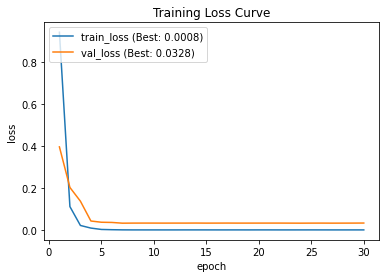

In [26]:
# os.environ['CUDA_VISIBLE_DEVICES']='1'
device = torch.device('cuda',0)
init_lr = 0.01

def adjust_lr(optimizer, epoch):
    # 1/10 learning rate every 5 epochs
    lr = init_lr * (0.001 ** (epoch // 7))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

def train():
    bestvalacc=0
    
    train_loss = []
    valL_loss = []
        
    model=models.resnet50(pretrained=True)
    model.fc=nn.Linear(in_features=2048, out_features=6, bias=True)
    #print(model)
    classes = ["0","1",'2','3','4','5']
    classes.sort()
    classes.sort(key = len)
    print("==========")
    # model = torch.nn.DataParallel(model, device_ids=device_ids)
    model = model.cuda(device=device)

    model.train()

    best_model_params = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    best_val_model_params = copy.deepcopy(model.state_dict())
    best_val_acc = 0.0
    
    # Training epochs
    num_epochs = 30 #20改3
    criterion = nn.CrossEntropyLoss()
    x=[]
    # Optimizer setting
    optimizer = torch.optim.SGD(params=model.parameters(), lr=init_lr, momentum=0.9)

    # Log 
    with open('TrainingAccuracy.txt','w') as fAcc:
        print('Accuracy\n', file = fAcc)
    with open('TrainingLoss.txt','w') as fLoss:
        print('Loss\n', file = fLoss)

    for epoch in range(num_epochs):
        x.append(epoch+1)
        model.train()
        localtime = time.asctime( time.localtime(time.time()) )
        print('Epoch: {}/{} --- < Starting Time : {} >'.format(epoch + 1,num_epochs,localtime))
        print('-' * len('Epoch: {}/{} --- < Starting Time : {} >'.format(epoch + 1,num_epochs,localtime)))

        training_loss = 0.0
        training_corrects = 0
        adjust_lr(optimizer, epoch)

        for i, (inputs, labels) in enumerate(tqdm(train_loader)):

            inputs = Variable(inputs.cuda(device=device))
            labels = Variable(labels.cuda(device=device))
            
            optimizer.zero_grad()

            outputs = model(inputs)
            
            _, preds = torch.max(outputs.data, 1)

            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            training_loss += float(loss.item() * inputs.size(0))
            training_corrects += torch.sum(preds == labels.data)
            
        training_loss = training_loss / len(train_set)

        training_acc = training_corrects.double() /len(train_set)
        train_loss.append(training_loss)
        print('Training loss: {:.4f}\taccuracy: {:.4f}\n'.format(training_loss,training_acc))

        # Check best accuracy model ( but not the best on test )
        if training_acc > best_acc:
            best_acc = training_acc
            best_model_params = copy.deepcopy(model.state_dict())


        with open('TrainingAccuracy.txt','a') as fAcc:
            print('{:.4f} '.format(training_acc), file = fAcc)
        with open('TrainingLoss.txt','a') as fLoss:
            print('{:.4f} '.format(training_loss), file = fLoss)

        model = model.cuda(device=device)
        model.eval()
        total_correct = 0
        total = 0
        class_correct = list(0. for i in enumerate(classes))
        class_total = list(0. for i in enumerate(classes))

        with torch.no_grad():
            val_loss=0.0
            for inputs, labels in tqdm(valid_loader):
                inputs = Variable(inputs.cuda(device=device))
                labels = Variable(labels.cuda(device=device))

                outputs = model(inputs)
                
                loss = criterion(outputs, labels) 
                # print(loss.item())     
                val_loss += float(loss.item() * inputs.size(0))
                
                
                _, predicted = torch.max(outputs.data, 1)
                
                # totoal
                total += labels.size(0)
                total_correct += (predicted == labels).sum().item()
                c = (predicted == labels).squeeze()
                
                # batch size
                for i in range(labels.size(0)):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

            for i, c in enumerate(classes):
                print('Accuracy of %5s : %8.4f %%' % (
                c, 100 * class_correct[i] / class_total[i]))

            # Accuracy
            print('\nAccuracy on the ALL test images: %.4f %%'
              % (100 * total_correct / total))
            val_acc = 100 * total_correct / total
        print('val accuracy: {:.4f}\n'.format(val_acc))
        val_loss = val_loss / len(valid_set)
        valL_loss.append(val_loss)
        if val_acc >= best_val_acc:
            best_val_acc = val_acc
            best_val_model_params = copy.deepcopy(model.state_dict())
            torch.save(model, './pth/seq-resnet50-model-{:.2f}-best_val_acc.pth'.format(val_acc))
    total = sum([param.nelement() for param in model.parameters()])
    print("Number of parameter: %.2fM" % (total/1e6))
    # Save best training/valid accuracy model ( not the best on test )
    model.load_state_dict(best_model_params)
    best_model_name = './pth/seq-resnet50-model-{:.2f}-best_train_acc.pth'.format(best_acc)
    torch.save(model, best_model_name)
    print("Best model name : " + best_model_name)
    draw('Training Loss Curve', 'epoch', 'loss', x, train_loss, valL_loss, 'Training Loss Curve.png')
if __name__ == '__main__':
    train()

Validation

In [85]:
PATH_TO_WEIGHTS = './pth/seq-resnet50-model-1.00-best_train_acc.pth'

def test(loader):
    allpredicted=[]
    totallabel=[]
    answers=[]
    classes = ["0","1","2","3","4","5"]
    classes.sort()

    # Load model
    model = torch.load(PATH_TO_WEIGHTS)

    model.eval()

    total_correct = 0
    total_false = 0
    total = 0
    class_correct = list(0. for i in enumerate(classes))
    class_total = list(0. for i in enumerate(classes))

    with torch.no_grad():
        for inputs, labels in tqdm(loader):
            inputs = Variable(inputs.cuda(device=device))
            labels = Variable(labels.cuda(device=device))
            
            outputs = model(inputs)

            _, predicted = torch.max(outputs.data, 1)
            
            softmax = torch.nn.Softmax(dim=1)#dim=1
            ans = softmax(outputs.cpu())
            
            for i in range(len(ans)):  
                allpredicted.append((ans[i].cpu()).tolist()) 
                answers.append((predicted[i].cpu()).item())
            totallabel += (labels.cpu()).tolist()

            # totoal
            total += labels.size(0)
            total_correct += (predicted == labels).sum().item()
            total_false += (predicted != labels).sum().item()
            c = (predicted == labels).squeeze()
            for i in range(labels.size(0)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1
        
    for i, c in enumerate(classes):
        print('Accuracy of %5s : %8.4f %%' % (c, 100 * class_correct[i] / class_total[i]))
    # Accuracy
    print('\nAccuracy on the ALL test images: %.4f %%'
          % (100 * total_correct / total))
    return allpredicted,totallabel,answers

if __name__ == "__main__":
    predicted,labels,answers = test(test_loader)

100%|██████████| 10/10 [00:03<00:00,  2.72it/s]

Accuracy of     0 :  99.6774 %
Accuracy of     1 :  99.3631 %
Accuracy of     2 :  98.9455 %
Accuracy of     3 :  99.8099 %
Accuracy of     4 :  99.7727 %
Accuracy of     5 :  99.6540 %

Accuracy on the ALL test images: 99.5098 %


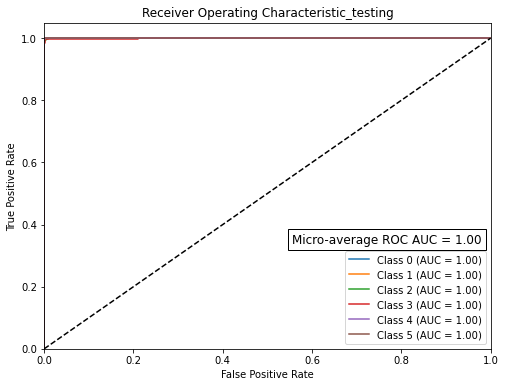

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


def roc_auc(y_true,y_pred,classes,title):

    y_true_binarized = label_binarize(y_true, classes=list(range(classes)))
    y_pred = np.array(y_pred)

    roc_auc_scores = roc_auc_score(y_true, y_pred,average='macro',multi_class='ovr')
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred[:, i])

    # Plot the ROC curves
    plt.figure(figsize=(8, 6))
    for i in range(classes):
        plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the random chance curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic_'+title)
    plt.legend(loc="lower right")

    # Add micro-average ROC AUC score to the plot
    plt.text(0.555, 0.34, 'Micro-average ROC AUC = %0.2f' % roc_auc_scores, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))
    
    
roc_auc(labels,predicted,6,'testing')

In [86]:
train_predicted,train_labels,train_answers = test(train_loader)

100%|██████████| 31/31 [00:10<00:00,  3.09it/s]

Accuracy of     0 : 100.0000 %
Accuracy of     1 : 100.0000 %
Accuracy of     2 : 100.0000 %
Accuracy of     3 : 100.0000 %
Accuracy of     4 : 100.0000 %
Accuracy of     5 : 100.0000 %

Accuracy on the ALL test images: 100.0000 %


In [87]:
val_predicted,val_labels,val_answers = test(valid_loader)

100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

Accuracy of     0 :  99.1903 %
Accuracy of     1 :  98.8095 %
Accuracy of     2 :  98.2533 %
Accuracy of     3 :  98.5714 %
Accuracy of     4 :  99.7151 %
Accuracy of     5 :  99.5671 %

Accuracy on the ALL test images: 98.9280 %


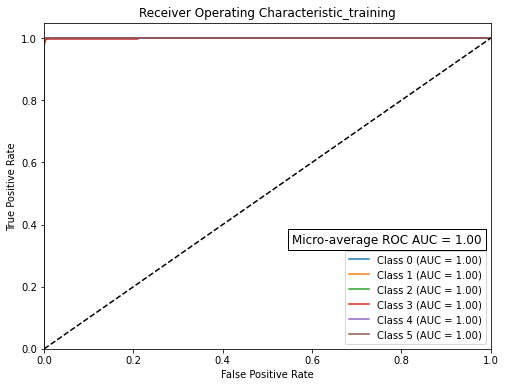

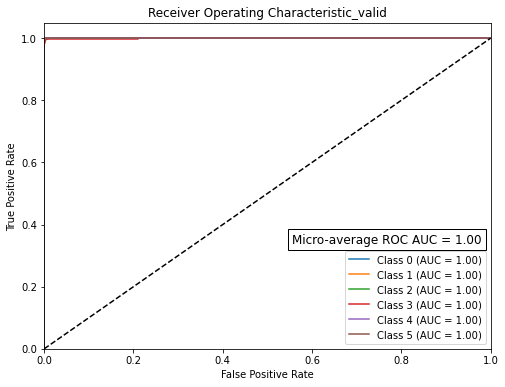

In [76]:
roc_auc(labels,predicted,6,'training')
roc_auc(labels,predicted,6,'valid')

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

train_y_true_binarized = label_binarize(train_labels, classes=list(range(6)))
val_y_true_binarized = label_binarize(val_labels, classes=list(range(6)))
y_true_binarized = label_binarize(labels, classes=list(range(6)))

train_mae = mean_absolute_error(train_y_true_binarized, train_predicted)
train_rmse = np.sqrt(mean_squared_error(train_y_true_binarized, train_predicted))

val_mae = mean_absolute_error(val_y_true_binarized, val_predicted)
val_rmse = np.sqrt(mean_squared_error(val_y_true_binarized, val_predicted))

test_mae = mean_absolute_error(y_true_binarized, predicted)
test_rmse = np.sqrt(mean_squared_error(y_true_binarized, predicted))



print("Overall MAE - Training: {:.4f}".format(train_mae))
print("Overall RMSE - Training: {:.4f}".format(train_rmse))
print("Overall MAE - Validation: {:.4f}".format(val_mae))
print("Overall RMSE - Validation: {:.4f}".format(val_rmse))
print("Overall MAE - Testing: {:.4f}".format(test_mae))
print("Overall RMSE - Testing: {:.4f}".format(test_rmse))

Overall MAE - Training: 0.0002
Overall RMSE - Training: 0.0013
Overall MAE - Validation: 0.0047
Overall RMSE - Validation: 0.0483
Overall MAE - Testing: 0.0024
Overall RMSE - Testing: 0.0353


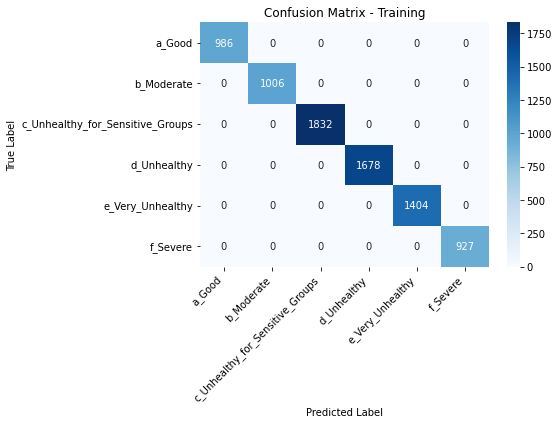

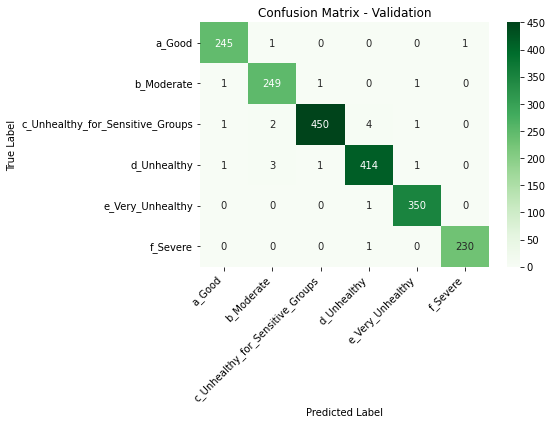

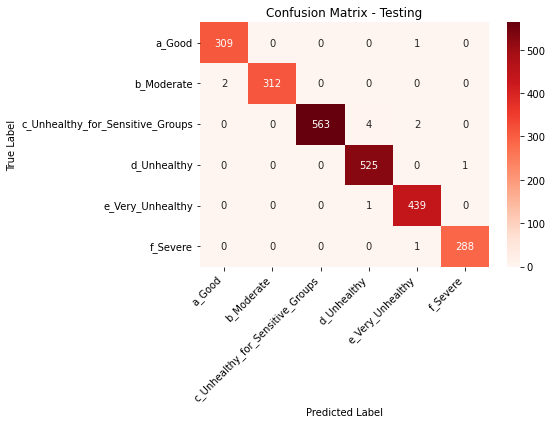

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrices
train_cm = confusion_matrix(train_labels, train_answers)
val_cm = confusion_matrix(val_labels, val_answers)
test_cm = confusion_matrix(labels, answers)

# Define class labels
class_labels = ['a_Good', 'b_Moderate','c_Unhealthy_for_Sensitive_Groups', 'd_Unhealthy','e_Very_Unhealthy', 'f_Severe']

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Validation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Testing')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [129]:
from PIL import Image
import pandas as pd


PATH_TO_WEIGHTS = './pth/seq-resnet50-model-1.00-best_train_acc.pth'
test_path = '/home/dannytu/Deeplearning/Final/dataset/Dataset_for_AQI_Classification/testing_data.csv'
test_df = pd.read_csv(test_path)
testfile = test_df['Filename']
model = torch.load(PATH_TO_WEIGHTS)
model.eval()
test_probabilities = []


with torch.no_grad():
    for img in testfile:
        im = Image.open('./dataset/Air_Pollution_Image_Dataset/Combined_Dataset/All_img/'+img)
        test_img = test_transforms(im)
        test_img = test_img.cuda(device=device)
        test_img = test_img.unsqueeze(0) #flatten
        outputs = model(test_img)
        softmax = torch.nn.Softmax(dim=1)#dim=1
        ans = softmax(outputs.cpu())
        test_probabilities.append([img]+(ans.tolist()[0]))

In [128]:

test_probabilities_df = pd.DataFrame(test_probabilities, 
                                    columns=['Filename','a_Good', 'b_Moderate','c_Unhealthy_for_Sensitive_Groups', 'd_Unhealthy','e_Very_Unhealthy', 'f_Severe'])

test_probabilities_df.to_csv('./test_results.csv', index=False)